In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
from google.cloud.logging import DESCENDING, Client
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.family'] = 'monospace'

In [18]:
bns = pd.read_csv('blockhashtime.txt', names=['block', 'hash', 'time'], delimiter=' ')
b16 = lambda x: int(x,16)
bns['block'] = bns['block'].apply(b16)
bns['time'] = bns['time'].apply(b16)
bns['time'] = pd.to_datetime(bns['time'],unit='s')
bns.head()

,block,hash,time
0,16897431,0x20309abbb2cb0b82418a0279d5065cfdf5114bfec38f...,2023-03-24 12:42:47
1,16899739,0x7f3f1bf7298f8a15bf2124c0976f47ef1d2a5892e3c5...,2023-03-24 20:28:47
2,16900041,0xe9dcad82dedcf43096aa7f2ddecfc29079c65f517a71...,2023-03-24 21:30:23
3,16901756,0x8ac660cbde3854a023f4c6ba251bec3d8b34f204f632...,2023-03-25 03:17:47
4,16902197,0xb66c8fbf2dd91489b474ac825d012bdc4b8cd84217f8...,2023-03-25 04:46:47


In [20]:
bns['time'].min(), bns['time'].max()

(Timestamp('2023-03-24 12:42:47'), Timestamp('2023-04-19 20:09:59'))

In [21]:
bins_dt = pd.date_range(bns['time'].min(), bns['time'].max(), freq='1H')
bins_str = bins_dt.astype(str).values

labels = ['({}, {}]'.format(bins_str[i-1], bins_str[i]) for i in range(1, len(bins_str))]

['(2023-03-24 12:42:47, 2023-03-24 13:42:47]',
 '(2023-03-24 13:42:47, 2023-03-24 14:42:47]',
 '(2023-03-24 14:42:47, 2023-03-24 15:42:47]',
 '(2023-03-24 15:42:47, 2023-03-24 16:42:47]',
 '(2023-03-24 16:42:47, 2023-03-24 17:42:47]',
 '(2023-03-24 17:42:47, 2023-03-24 18:42:47]',
 '(2023-03-24 18:42:47, 2023-03-24 19:42:47]',
 '(2023-03-24 19:42:47, 2023-03-24 20:42:47]',
 '(2023-03-24 20:42:47, 2023-03-24 21:42:47]',
 '(2023-03-24 21:42:47, 2023-03-24 22:42:47]',
 '(2023-03-24 22:42:47, 2023-03-24 23:42:47]',
 '(2023-03-24 23:42:47, 2023-03-25 00:42:47]',
 '(2023-03-25 00:42:47, 2023-03-25 01:42:47]',
 '(2023-03-25 01:42:47, 2023-03-25 02:42:47]',
 '(2023-03-25 02:42:47, 2023-03-25 03:42:47]',
 '(2023-03-25 03:42:47, 2023-03-25 04:42:47]',
 '(2023-03-25 04:42:47, 2023-03-25 05:42:47]',
 '(2023-03-25 05:42:47, 2023-03-25 06:42:47]',
 '(2023-03-25 06:42:47, 2023-03-25 07:42:47]',
 '(2023-03-25 07:42:47, 2023-03-25 08:42:47]',
 '(2023-03-25 08:42:47, 2023-03-25 09:42:47]',
 '(2023-03-25

In [30]:
counts = []
hours = []
for i in range(len(bins_dt)-1):
    lb, up = bins_dt[i], bins_dt[i+1]
    sub = bns[(bns['time'] >= lb) & (bns['time'] < up)]
    counts.append(len(sub))
    hours.append(lb)

In [31]:
counts

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


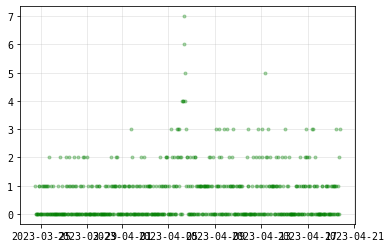

In [35]:
plt.plot(hours, counts, 'g.', alpha=0.3)

In [23]:
bns['cut'] = pd.cut(bns['time'], bins=bins_dt, labels=labels)
bns.head()

,block,hash,time,cut
0,16897431,0x20309abbb2cb0b82418a0279d5065cfdf5114bfec38f...,2023-03-24 12:42:47,NaN
1,16899739,0x7f3f1bf7298f8a15bf2124c0976f47ef1d2a5892e3c5...,2023-03-24 20:28:47,"(2023-03-24 19:42:47, 2023-03-24 20:42:47]"
2,16900041,0xe9dcad82dedcf43096aa7f2ddecfc29079c65f517a71...,2023-03-24 21:30:23,"(2023-03-24 20:42:47, 2023-03-24 21:42:47]"
3,16901756,0x8ac660cbde3854a023f4c6ba251bec3d8b34f204f632...,2023-03-25 03:17:47,"(2023-03-25 02:42:47, 2023-03-25 03:42:47]"
4,16902197,0xb66c8fbf2dd91489b474ac825d012bdc4b8cd84217f8...,2023-03-25 04:46:47,"(2023-03-25 04:42:47, 2023-03-25 05:42:47]"


In [24]:
bns['cut'].value_counts()

(2023-04-06 07:42:47, 2023-04-06 08:42:47]    7
(2023-04-06 08:42:47, 2023-04-06 09:42:47]    6
(2023-04-06 10:42:47, 2023-04-06 11:42:47]    5
(2023-04-13 08:42:47, 2023-04-13 09:42:47]    5
(2023-04-06 06:42:47, 2023-04-06 07:42:47]    4
                                             ..
(2023-04-09 09:42:47, 2023-04-09 10:42:47]    0
(2023-04-09 11:42:47, 2023-04-09 12:42:47]    0
(2023-04-09 13:42:47, 2023-04-09 14:42:47]    0
(2023-04-09 14:42:47, 2023-04-09 15:42:47]    0
(2023-03-24 12:42:47, 2023-03-24 13:42:47]    0
Name: cut, Length: 631, dtype: int64

In [3]:
bns = pd.read_csv('missed.txt', names=['bn'])
bns.head()

,bn
0,17082921
1,17082727
2,17082670
3,17082495
4,17082479


In [11]:
sorted(bns['bn'].values)

[16897431,
 16899739,
 16900041,
 16901756,
 16902197,
 16903059,
 16903657,
 16903991,
 16904602,
 16905193,
 16905863,
 16906017,
 16907477,
 16908398,
 16911217,
 16912697,
 16912713,
 16913678,
 16916196,
 16916400,
 16916663,
 16917163,
 16917957,
 16918003,
 16918472,
 16918809,
 16919801,
 16920491,
 16921060,
 16921094,
 16921793,
 16922632,
 16924091,
 16924100,
 16924797,
 16925443,
 16926787,
 16926830,
 16927087,
 16927108,
 16927269,
 16929205,
 16929392,
 16929847,
 16931755,
 16932216,
 16934936,
 16935301,
 16936356,
 16936694,
 16940210,
 16940970,
 16942077,
 16943907,
 16944143,
 16944230,
 16944475,
 16945368,
 16945980,
 16946247,
 16946521,
 16946825,
 16947208,
 16947226,
 16947309,
 16947324,
 16948594,
 16949208,
 16951069,
 16951786,
 16952082,
 16952846,
 16954487,
 16954676,
 16955031,
 16956266,
 16956278,
 16956346,
 16956692,
 16956742,
 16956859,
 16957040,
 16959687,
 16959794,
 16960910,
 16962035,
 16962083,
 16962171,
 16963300,
 16963991,
 16964066,

In [ ]:
url = 'https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz'
headers = {'content-type': 'application/json'}
payload = {"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0}
r = requests.post(url, headers=headers)

In [6]:
url = 'https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZB'
payload = '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0}]'
headers = {'content-type': 'application/json'}
r = requests.post(url, data=payload, headers=headers)

In [ ]:
payload = '['
for i in sorted(bns['bn'].values):
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

In [7]:
r.json()

[{'jsonrpc': '2.0',
  'id': 0,
  'error': {'code': -32000, 'message': 'Must be authenticated!'}}]

In [ ]:
curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H "Content-Type: application/json" -s -d '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]' 
    | jq -jr '.[] | .result["number"], " ", .result["hash"], " ", .result["timestamp"], "\n"' > feb263.txt

In [36]:
forked = pd.read_csv('forked_past_week.csv')
forked.head()

,block_status,@timestamp,block_epoch,block_height
0,forked,2023-04-06T15:30:35+00:00,192632,6164251
1,forked,2023-04-06T15:09:35+00:00,192629,6164146
2,forked,2023-04-06T14:50:35+00:00,192626,6164051
3,forked,2023-04-06T14:23:35+00:00,192622,6163916
4,forked,2023-04-06T14:22:23+00:00,192622,6163910
